In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Enoncé

**Projet 5** du parcours d'Data Analyst d' OpenClassrooms: **Optimisez la gestion des données d'une boutique avec R ou Python**
En tant que data analyst freelance chez BottleNeck, fais une étude sur les données de l’ERP et la table de l’outil de CMS.

Fichiers ultilisés:
- *erp.csv*: un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock
- *liaison*: une table établi le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU)
- *web*: un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...)

# Sommaire
- Partie 1. Préparer les données
- Partie 2. Calculer le chiffre d'affaires
- Partie 3. Détecter les valeurs aberrantes

# Préparer les données

## 1.  'erp.csv'

In [2]:
df_erp = pd.read_csv('erp.csv')
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


###   <font color = Indigo> Verfier l'information basique; s'il y a valeurs manquantes </font>

In [3]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### <font color = Indigo> Créer 'df_erp_web' pour la partie de produit vente en ligne </font>

In [4]:
# créer le dataframe et selectionner la partie de web
df_erp_web = df_erp.loc[df_erp['onsale_web'] == 1, :]
df_erp_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
 4   stock_status    717 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.6+ KB


### <font color = Indigo> Doublon de la clé primaire 'product_id' ? </font>

In [5]:
# verifier s'il y a product_id doublon
assert df_erp_web['product_id'].duplicated().any() == False

## 2. 'liaison.csv'

In [6]:
liaison_original = pd.read_csv('liaison.csv')
liaison_original.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


###   <font color = Indigo> Verfier l'information basique </font>

In [7]:
liaison_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


###   <font color = Indigo> Créer 'liason_web' pour la partie de web </font>

In [8]:
# créer le dataframe pour la partie des products vendu en ligne
liaison_web = liaison_original.loc[liaison_original['product_id'].isin(df_erp_web['product_id']),:]
liaison_web = liaison_web.rename(columns={'id_web' : 'sku'})   # renommer 'sku'
liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  717 non-null    int64 
 1   sku         714 non-null    object
dtypes: int64(1), object(1)
memory usage: 16.8+ KB


###   <font color = Indigo> Gérer les valeurs manquantes </font>

In [9]:
# verifier les null pour 'sku'
liaison_null = liaison_web.loc[liaison_web['sku'].isnull(),:]
liaison_null

,product_id,sku
242,4594,NaN
486,5070,NaN
487,5075,NaN


In [10]:
# verifier la liste de null de 'id_web' dans le dataframe de 'df_erp_web'
df_erp_web.loc[df_erp_web['product_id'].isin(liaison_null['product_id']),:]

,product_id,onsale_web,price,stock_quantity,stock_status
242,4594,1,144.0,0,outofstock
486,5070,1,84.7,0,outofstock
487,5075,1,43.3,0,outofstock


In [11]:
# selectionner que la partie not null et créer le dataframe 'df_liaison_notnull'
df_liaison_notnull = liaison_web.loc[liaison_web['sku'].notnull(),:]
df_liaison_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  714 non-null    int64 
 1   sku         714 non-null    object
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


### <font color = Indigo> Doublon ? </font>

In [12]:
# verifier s'il y a product_id doublon
assert df_liaison_notnull['product_id'].duplicated().any() == False

In [13]:
# verifier s'il y a sku doulon
assert df_liaison_notnull['sku'].duplicated().any() == False

## 3. 'web.csv'

In [14]:
df_web_original = pd.read_csv('web.csv')
df_web_original

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


###   <font color = Indigo> Verfier l'information basique </font>

In [15]:
df_web_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [16]:
df_web_original.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


### <font color = Indigo> Gérer les valeurs manquantes </font>

In [17]:
# verifier les nulls pour clé primaire 'sku'
df_sku_null = df_web_original.loc[df_web_original['sku'].isnull(),:].copy()
df_sku_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <font color = Indigo> Analyser les valeurs manquantes </font>

In [18]:
# compter le nombre NaN de chaque ligne
df_sku_null['NB_NAN'] = df_sku_null.isna().sum(axis=1)

# verifier le nombre de NaN de chaque ligne
df_sku_null['NB_NAN'].describe()

count    85.000000
mean     24.552941
std       2.897067
min       6.000000
25%      25.000000
50%      25.000000
75%      25.000000
max      25.000000
Name: NB_NAN, dtype: float64

In [19]:
# verifier 'NB_NAN' moin de 25
df_sku_null1 = df_sku_null.loc[df_sku_null['NB_NAN'] < 25, :]
df_sku_null1

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,NB_NAN
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6


In [20]:
# exclure null
df_web_notnull = df_web_original.loc[df_web_original['sku'].notnull(),:]

### <font color = Indigo> Éliminez les doublons </font>

In [21]:
# calculer le nombre de sku unique
df_web_notnull['sku'].nunique()

714

In [22]:
# verifier sku doublon
web_all_doublon = df_web_notnull.duplicated('sku', keep = False)
df_web_notnull[web_all_doublon].sort_values(by = 'sku')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1046,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1106,10775,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 21:28:52,...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,9636,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-03-22 10:44:57,...,whisky-wemyss-the-hive-12-ans,2020-08-19 17:45:03,2020-08-19 15:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1201,9937,0,0,0,0.0,4.0,NaN,NaN,2.0,2018-05-17 12:55:13,...,marcel-richaud-cairanne-rouge-les-estrambords-...,2019-06-26 09:32:25,2019-06-26 07:32:25,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
422,9937,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-05-17 12:55:13,...,marcel-richaud-cairanne-rouge-les-estrambords-...,2019-06-26 09:32:25,2019-06-26 07:32:25,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
# Éliminez les doublons
df_websales = df_web_notnull.loc[df_web_notnull['tax_status'] == 'taxable', ['sku', 'total_sales','post_title' ]]
df_websales['name'] = df_websales['sku'] + ' ' + df_websales['post_title'] # ajouter le nom avec 'sku' et 'post_title' pour la présentation
df_websales.head()

,sku,total_sales,post_title,name
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-25-euros Bon cadeau de 25€
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,15298 Pierre Jean Villa Saint-Joseph Préface 2018
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296 Pierre Jean Villa Saint-Joseph Rouge Til...
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300 Pierre Jean Villa Crozes-Hermitage Accro...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814 Pierre Jean Villa IGP Collines Rhodanien...


In [24]:
# revérifier s'il y a valeur doulon
any(df_websales['sku'].duplicated())

False

In [25]:
df_websales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          714 non-null    object 
 1   total_sales  714 non-null    float64
 2   post_title   714 non-null    object 
 3   name         714 non-null    object 
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


## 4. La jointure de 'df_websales', 'df_liaison_notnull' ,  'df_erp_web'

In [26]:
# Faire la jointure de 3 dataframes 'df_websales', 'df_liaison_notnull' et 'df_erp_web'
df_temp_web = pd.merge(df_liaison_notnull, df_websales, on= 'sku', how = 'inner')
df_web = pd.merge(df_temp_web, df_erp_web, on= 'product_id', how = 'inner')
df_web

,product_id,sku,total_sales,post_title,name,onsale_web,price,stock_quantity,stock_status
0,3847,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,15298 Pierre Jean Villa Saint-Joseph Préface 2018,1,24.2,0,outofstock
1,3849,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296 Pierre Jean Villa Saint-Joseph Rouge Til...,1,34.3,0,outofstock
2,3850,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300 Pierre Jean Villa Crozes-Hermitage Accro...,1,20.8,0,outofstock
3,4032,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814 Pierre Jean Villa IGP Collines Rhodanien...,1,14.1,0,outofstock
4,4039,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,19815 Pierre Jean Villa Côte Rôtie Carmina 2017,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...
709,6930,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,16135 Mouthes Le Bihan Côtes de Duras L'Aimé C...,1,8.4,83,instock
710,7023,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,15891 Camin Larredya Jurançon Sec La Virada 2018,1,27.5,15,instock
711,7025,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,15887 Domaine Jamet Côte Rôtie Fructus Volupta...,1,69.0,2,instock
712,7247,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,13127-1 Clos du Mont-Olivet Châteauneuf-du-Pap...,1,54.8,23,instock


In [27]:
# verifier information basique de 'df_web'
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      714 non-null    int64  
 1   sku             714 non-null    object 
 2   total_sales     714 non-null    float64
 3   post_title      714 non-null    object 
 4   name            714 non-null    object 
 5   onsale_web      714 non-null    int64  
 6   price           714 non-null    float64
 7   stock_quantity  714 non-null    int64  
 8   stock_status    714 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 55.8+ KB


### <font color = Indigo> Modifier les types et verifier information basique </font>

In [28]:
df_web['product_id'] = df_web['product_id'].astype('category')
df_web['sku'] = df_web['sku'].astype('category')
df_web.describe()

,total_sales,onsale_web,price,stock_quantity
count,714.000000,714.0,714.000000,714.000000
mean,4.012605,1.0,32.493137,28.746499
std,8.518183,0.0,27.810525,48.012608
min,0.000000,1.0,5.200000,0.000000
25%,0.000000,1.0,14.100000,2.000000
50%,1.000000,1.0,23.550000,12.000000
75%,4.000000,1.0,42.175000,35.000000
max,96.000000,1.0,225.000000,578.000000


# Calculer le chiffre d'affaires

## 1. Calculer le chiffre d'affaire par produit

In [29]:
# calculer le chiffre d'affaire par produit
df_web['CA'] = df_web['total_sales']*df_web['price']
df_web.head()

,product_id,sku,total_sales,post_title,name,onsale_web,price,stock_quantity,stock_status,CA
0,3847,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,15298 Pierre Jean Villa Saint-Joseph Préface 2018,1,24.2,0,outofstock,145.2
1,3849,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296 Pierre Jean Villa Saint-Joseph Rouge Til...,1,34.3,0,outofstock,0.0
2,3850,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300 Pierre Jean Villa Crozes-Hermitage Accro...,1,20.8,0,outofstock,0.0
3,4032,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814 Pierre Jean Villa IGP Collines Rhodanien...,1,14.1,0,outofstock,42.3
4,4039,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,19815 Pierre Jean Villa Côte Rôtie Carmina 2017,1,46.0,0,outofstock,0.0


## 2. L'analyse du chiffre d'affaire par produit

In [30]:
df_web['CA'].describe()

count     714.000000
mean       98.835574
std       307.685071
min         0.000000
25%         0.000000
50%        15.250000
75%        91.150000
max      4704.000000
Name: CA, dtype: float64

## 3. Le total du chiffre d’affaires réalisé en ligne

In [31]:
# calculer le chiffre d'affaire total
ca_sum = round(sum(df_web['CA']),2)
print('Le total du chiffre d’affaires réalisé en ligne estimé: ' + str(ca_sum) + ' EUR')

Le total du chiffre d’affaires réalisé en ligne estimé: 70568.6 EUR


## *4. La visualisation du chiffre d'affaire

In [32]:
# faire la mise en ordre de données en fonction de 'CA'
df_web = df_web.sort_values(by='CA', ascending= False)

In [33]:
# créer le widget et le graphique
def top_ca_widget (top_nb_ca = 10):
    df_web_top = df_web.iloc[0:top_nb_ca]
    plt.figure(figsize=(12,10))
    sns.barplot(x= df_web_top['CA'], y=df_web_top['name'])
    plt.title('Le chiffre d’affaires par produit')

In [34]:
widgets.interact(top_ca_widget, top_nb_ca = (0, len(df_web)))

interactive(children=(IntSlider(value=10, description='top_nb_ca', max=714), Output()), _dom_classes=('widget-…

<function __main__.top_ca_widget(top_nb_ca=10)>

## *5. L'analyse supplémentaire: prix vs. CA

In [35]:
df_web['price_category'] = pd.qcut(df_web['price'], 10)
df_price_category = df_web.groupby(by = 'price_category').sum()
df_price_category = df_price_category.reset_index()
df_price_category

,price_category,total_sales,onsale_web,price,stock_quantity,CA
0,"(5.199, 9.9]",650.0,75,612.20,6914,5112.3
1,"(9.9, 12.8]",283.0,70,814.60,2724,3303.9
2,"(12.8, 16.1]",306.0,70,999.45,2584,4301.1
3,"(16.1, 19.0]",259.0,77,1349.80,1933,4454.3
4,"(19.0, 23.55]",310.0,65,1388.55,1637,6651.1
5,"(23.55, 28.4]",305.0,72,1873.20,1812,7859.4
6,"(28.4, 37.73]",180.0,71,2307.80,1020,5800.0
7,"(37.73, 48.74]",191.0,71,3030.10,810,8120.8
8,"(48.74, 62.47]",297.0,71,3938.00,521,15207.7
9,"(62.47, 225.0]",84.0,72,6886.40,570,9758.0


Text(0.5, 1.0, "L'analyse du prix vs. chiffre d'affaire ")

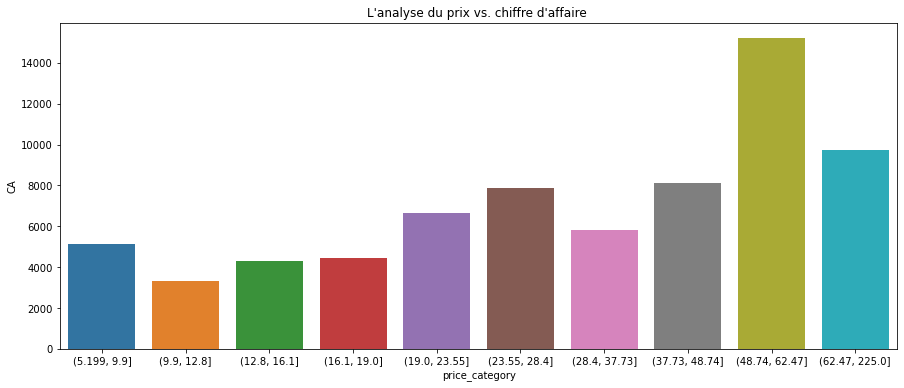

In [36]:
plt.figure (figsize = (15,6))
sns.barplot(x = df_price_category['price_category'], y = df_price_category ['CA'])
plt.title("L'analyse du prix vs. chiffre d'affaire ")

# Détecter les valeurs aberrantes

## 1. L'analyse du prix

In [37]:
df_web['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

## 2. Boxplot

Text(0.5, 1.0, "L'analyse la distribution de prix")

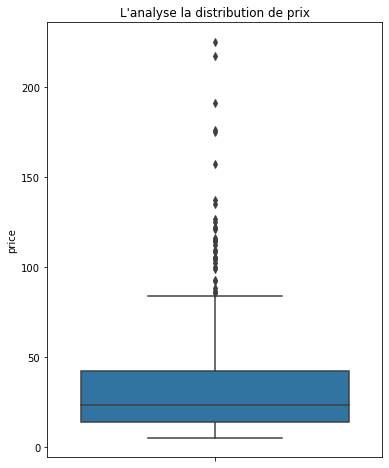

In [38]:
# analyser les prix avec le graphique boîte et moustache
plt.figure(figsize=(6,8))
sns.boxplot(y=df_web['price'])
plt.title("L'analyse la distribution de prix")

## 3. IQR ( [Interquartile range](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097) )

Une valeur aberrante dans une distribution est un nombre qui est plus d'une fois et demie la longueur de la boîte à l'écart du quartile inférieur ou supérieur. Speciﬁcally, si un nombre est inférieur à Q1 - 1,5×IQR ou supérieur à Q3 + 1,5×IQR, alors c'est une valeur aberrante.

In [39]:
# calculer l'IQR
price_q1 = df_web['price'].quantile(q=0.25)
price_q3 = df_web['price'].quantile(q=0.75)
IQR = price_q3-price_q1
print('price_q1= ' + str(price_q1) +
      '\nprice_q3= ' + str(price_q3) +
      '\nIQR= ' + str(IQR))

price_q1= 14.1
price_q3= 42.175000000000004
IQR= 28.075000000000003


###   <font color = Indigo> Calculer les seuils </font>

In [40]:
# verifier les seuils
print('Le seuil bas = price_q1 - 1.5*IQR = ' + str(round(price_q1 - 1.5*IQR,2))
      + '\nLe seuil haut = price_q3 + 1.5*IQR = ' + str(round(price_q3 + 1.5*IQR,2)))

Le seuil bas = price_q1 - 1.5*IQR = -28.01
Le seuil haut = price_q3 + 1.5*IQR = 84.29


In [41]:
# verifier s'il y a prix en dessous le seuil bas
any(df_web['price'] < price_q1 - 1.5*IQR)

False

In [42]:
# verifier s'il y a prix au-dessus le seuil haut
any(df_web['price'] > price_q3 + 1.5*IQR)

True

###   <font color = Indigo> La liste d'outlier avec la méthode IQR </font>

In [43]:
# lister les outliers au-dessus le seuil haut
df_price_outlier = df_web.loc[df_web['price'] > price_q3 + 1.5*IQR, :]
df_price_outlier

,product_id,sku,total_sales,post_title,name,onsale_web,price,stock_quantity,stock_status,CA,price_category
218,4402,3510,13.0,Cognac Frapin VIP XO,3510 Cognac Frapin VIP XO,1,176.0,8,instock,2288.0,"(62.47, 225.0]"
201,4355,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12589 Champagne Egly-Ouriet Grand Cru Blanc de...,1,126.5,2,instock,1391.5,"(62.47, 225.0]"
199,4352,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,15940 Champagne Egly-Ouriet Grand Cru Millésim...,1,225.0,0,outofstock,1125.0,"(62.47, 225.0]"
381,4904,14220,5.0,Domaine Des Croix Corton Charlemagne Grand Cru...,14220 Domaine Des Croix Corton Charlemagne Gra...,1,137.0,13,instock,685.0,"(62.47, 225.0]"
587,5892,14983,3.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,14983 Coteaux Champenois Egly-Ouriet Ambonnay ...,1,191.3,10,instock,573.9,"(62.47, 225.0]"
642,6126,14923,2.0,Champagne Gosset Célébris Vintage 2007,14923 Champagne Gosset Célébris Vintage 2007,1,135.0,10,instock,270.0,"(62.47, 225.0]"
653,6212,13996,2.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,13996 Domaine des Comtes Lafon Volnay 1er Cru ...,1,115.0,2,instock,230.0,"(62.47, 225.0]"
219,4404,3507,2.0,Cognac Frapin Château de Fontpinot XO,3507 Cognac Frapin Château de Fontpinot XO,1,108.5,2,instock,217.0,"(62.47, 225.0]"
222,4407,3509,1.0,Cognac Frapin Cigar Blend,3509 Cognac Frapin Cigar Blend,1,104.0,6,instock,104.0,"(62.47, 225.0]"
205,4359,13853,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,13853 Champagne Larmandier-Bernier Grand Cru L...,1,85.6,0,outofstock,85.6,"(62.47, 225.0]"


###   <font color = Indigo> L'analyse d'outlier (IQR) </font>

In [44]:
# le nombre d'outliers
df_price_outlier.describe()

,total_sales,onsale_web,price,stock_quantity,CA
count,32.000000,32.0,32.000000,32.000000,32.000000
mean,1.406250,1.0,124.571875,7.250000,217.812500
std,3.109397,0.0,36.068727,5.588006,505.080853
min,0.000000,1.0,85.600000,0.000000,0.000000
25%,0.000000,1.0,103.575000,2.750000,0.000000
50%,0.000000,1.0,114.500000,7.000000,0.000000
75%,1.250000,1.0,128.625000,10.250000,132.250000
max,13.000000,1.0,225.000000,20.000000,2288.000000


Text(0, 0.5, 'le nombre de prix')

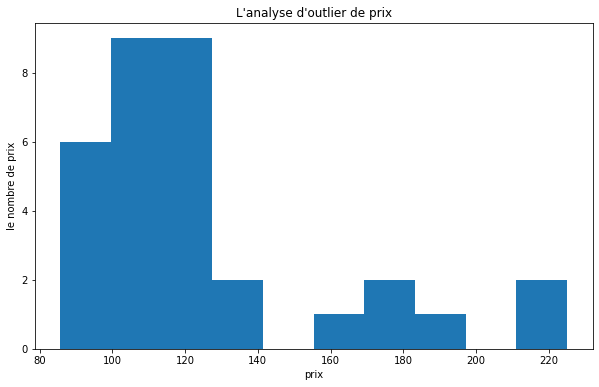

In [45]:
# l'analyse d'outliers
plt.figure(figsize = (10,6))
df_price_outlier['price'].plot(kind = 'hist')
plt.title("L'analyse d'outlier de prix")
plt.xlabel("prix")
plt.ylabel("le nombre de prix")

Text(0.5, 1.0, "L'analyse d'outlier de prix")

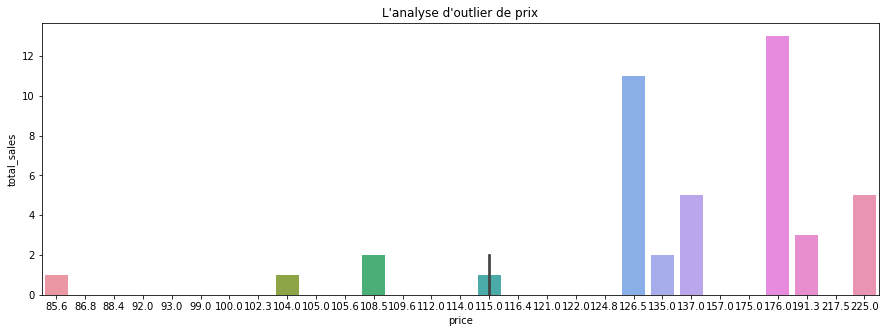

In [46]:
# l'analyse d'outliers avec le nombre de vente
plt.figure (figsize = (15,5))
sns.barplot(x = df_price_outlier['price'], y = df_price_outlier['total_sales'])
plt.title("L'analyse d'outlier de prix")

## 4. [Z-score](https://datascience.eu/fr/mathematiques-et-statistiques/quest-ce-quun-z-score/https://datascience.eu/fr/mathematiques-et-statistiques/quest-ce-quun-z-score/)

Un z-score est le nombre d’écarts types par rapport à la moyenne d’un point d’information. L’équation: z = (x – μ)/σ .

- -/+1 stdev.  ~68%
- -/+2 stdev.  ~95% 
- -/+3 stdev.  ~99.7%

In [47]:
# Calculer les Z-scores de chaque sku
price_mean = df_web['price'].mean()
price_std = df_web['price'].std() # calculer l'écart-type (standard deviation)
df_web['z_score'] = (df_web['price'] - price_mean)/price_std
df_web.head()

,product_id,sku,total_sales,post_title,name,onsale_web,price,stock_quantity,stock_status,CA,price_category,z_score
194,4334,7818,96.0,Champagne Gosset Grand Blanc de Blancs,7818 Champagne Gosset Grand Blanc de Blancs,1,49.0,0,outofstock,4704.0,"(48.74, 62.47]",0.593547
71,4144,1662,87.0,Champagne Gosset Grand Rosé,1662 Champagne Gosset Grand Rosé,1,49.0,11,instock,4263.0,"(48.74, 62.47]",0.593547
218,4402,3510,13.0,Cognac Frapin VIP XO,3510 Cognac Frapin VIP XO,1,176.0,8,instock,2288.0,"(62.47, 225.0]",5.160164
70,4142,11641,30.0,Champagne Gosset Grand Millésime 2006,11641 Champagne Gosset Grand Millésime 2006,1,53.0,8,instock,1590.0,"(48.74, 62.47]",0.737378
69,4141,304,40.0,Champagne Gosset Grande Réserve,304 Champagne Gosset Grande Réserve,1,39.0,1,instock,1560.0,"(37.73, 48.74]",0.233971


###   <font color = Indigo> Calculer les seuils </font>

In [48]:
# verifier le seuils haut (threshold = 2; fyi: +2 stdev. ~95%, +3 stdev. ~99.7%;)
seuil_z = 2*price_std + price_mean
print ('Le seuil de la méthode Z-score avec threshold comme 2: ' + str(round(seuil_z,2)))

Le seuil de la méthode Z-score avec threshold comme 2: 88.11


###   <font color = Indigo> La liste d'outliers avec la méthode Z-score </font>

In [49]:
# lister les outliers au-dessus le seuil haut (threshold = 2; fyi: +2 stdev. ~95%, +3 stdev. ~99.7%;)
df_z2 = df_web.loc[df_web['z_score'] > 2,:]
df_z2

,product_id,sku,total_sales,post_title,name,onsale_web,price,stock_quantity,stock_status,CA,price_category,z_score
218,4402,3510,13.0,Cognac Frapin VIP XO,3510 Cognac Frapin VIP XO,1,176.0,8,instock,2288.0,"(62.47, 225.0]",5.160164
201,4355,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12589 Champagne Egly-Ouriet Grand Cru Blanc de...,1,126.5,2,instock,1391.5,"(62.47, 225.0]",3.380262
199,4352,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,15940 Champagne Egly-Ouriet Grand Cru Millésim...,1,225.0,0,outofstock,1125.0,"(62.47, 225.0]",6.922087
381,4904,14220,5.0,Domaine Des Croix Corton Charlemagne Grand Cru...,14220 Domaine Des Croix Corton Charlemagne Gra...,1,137.0,13,instock,685.0,"(62.47, 225.0]",3.757817
587,5892,14983,3.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,14983 Coteaux Champenois Egly-Ouriet Ambonnay ...,1,191.3,10,instock,573.9,"(62.47, 225.0]",5.710315
642,6126,14923,2.0,Champagne Gosset Célébris Vintage 2007,14923 Champagne Gosset Célébris Vintage 2007,1,135.0,10,instock,270.0,"(62.47, 225.0]",3.685902
653,6212,13996,2.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,13996 Domaine des Comtes Lafon Volnay 1er Cru ...,1,115.0,2,instock,230.0,"(62.47, 225.0]",2.966750
219,4404,3507,2.0,Cognac Frapin Château de Fontpinot XO,3507 Cognac Frapin Château de Fontpinot XO,1,108.5,2,instock,217.0,"(62.47, 225.0]",2.733025
222,4407,3509,1.0,Cognac Frapin Cigar Blend,3509 Cognac Frapin Cigar Blend,1,104.0,6,instock,104.0,"(62.47, 225.0]",2.571216
511,5612,14915,0.0,Domaine Weinbach Gewurztraminer Grand Cru Furs...,14915 Domaine Weinbach Gewurztraminer Grand Cr...,1,124.8,12,instock,0.0,"(62.47, 225.0]",3.319134


###   <font color = Indigo> L'analyse d'outlier (z-score) </font>

In [50]:
df_z2.describe()

,total_sales,onsale_web,price,stock_quantity,CA,z_score
count,30.000000,30.0,30.0000,30.000000,30.000000,30.000000
mean,1.466667,1.0,127.1300,7.666667,229.480000,3.402915
std,3.202729,0.0,35.8097,5.516954,519.923746,1.287631
min,0.000000,1.0,88.4000,0.000000,0.000000,2.010277
25%,0.000000,1.0,105.0000,3.250000,0.000000,2.607173
50%,0.000000,1.0,115.0000,7.000000,0.000000,2.966750
75%,1.750000,1.0,132.8750,10.750000,188.750000,3.609492
max,13.000000,1.0,225.0000,20.000000,2288.000000,6.922087


Text(0.5, 1.0, "L'analyse d'outlier de prix")

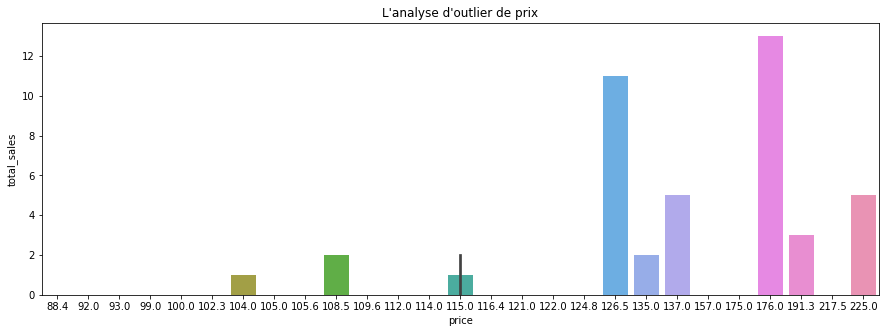

In [51]:
# l'analyse d'outliers avec le nombre de vente
plt.figure (figsize = (15,5))
sns.barplot(x = df_z2['price'], y = df_z2 ['total_sales'])
plt.title("L'analyse d'outlier de prix")

## 5. Histogramme

Text(0, 0.5, 'le nombre de prix')

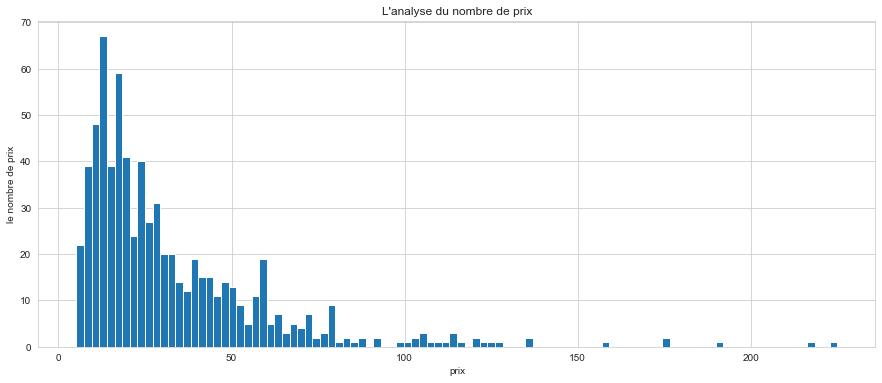

In [52]:
# analyser les prix avec le graphique histogramme
plt.figure(figsize=(15,6))
sns.set_style('whitegrid') 
df_web['price'].plot(kind = 'hist', bins = 100)
plt.title("L'analyse du nombre de prix")
plt.xlabel("prix")
plt.ylabel("le nombre de prix")

## 6. Scatter Plot

Text(0, 0.5, 'le nombre de vente')

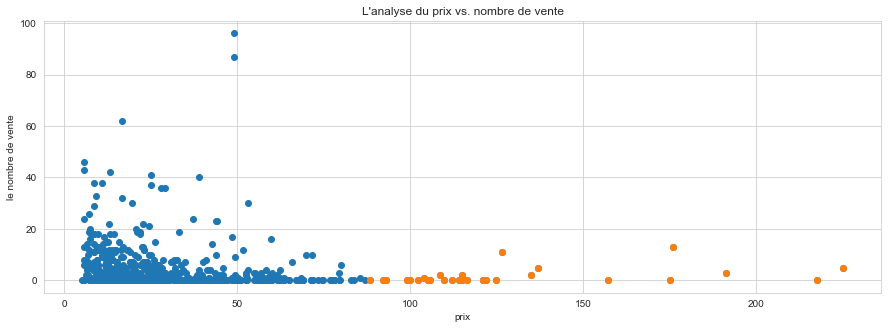

In [53]:
# créer un graphique scatter plot et marquer les outliers 
df_price_outlier = df_web.loc[df_web['price']>2*price_std + price_mean, :]
plt.figure(2, figsize = (15,5))
plt.scatter (x= df_web['price'], y= df_web['total_sales'] )
plt.scatter (x= df_price_outlier['price'], y= df_price_outlier['total_sales'] )
plt.title("L'analyse du prix vs. nombre de vente")
plt.xlabel("prix")
plt.ylabel("le nombre de vente")